![header%20ipynb.png](attachment:header%20ipynb.png)

# Hands-On
---

Hands-On ini digunakan pada kegiatan Microcredential Associate Data Scientist 2021

# Tugas Mandiri Pertemuan 15
---
Pertemuan 15 (limabelas) pada Microcredential Associate Data Scientist 2021 menyampaikan materi mengenai Membangun Model (Clustering). silakan Anda kerjakan Latihan 1 s/d 10. Output yang anda lihat merupakan panduan yang dapat Anda ikuti dalam penulisan code :)

# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Customer Segmentation</p>

<img src="https://github.com/KarnikaKapoor/Files/blob/main/Colorful%20Handwritten%20About%20Me%20Blank%20Education%20Presentation.gif?raw=true">


Dalam Kasus ini, kita akan melakukan pengelompokan data tanpa pengawasan /unsupervised clustering pada catatan pelanggan dari database perusahaan bahan makanan. Segmentasi pelanggan/Customer segmentation adalah praktik memisahkan pelanggan ke dalam kelompok-kelompok yang mencerminkan kesamaan di antara pelanggan di setiap cluster. Kita akan membagi pelanggan menjadi beberapa segmen untuk mengoptimalkan signifikansi setiap pelanggan bagi bisnis. Untuk memodifikasi produk sesuai dengan kebutuhan dan perilaku pelanggan yang berbeda. Ini juga membantu bisnis untuk memenuhi kekhawatiran berbagai jenis pelanggan.


   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">TABLE OF CONTENTS</p>   
    
[1. IMPORTING LIBRARIES](#1)
    
[2. LOADING DATA](#2)
    
[3. DATA CLEANING](#3)
    
[4. DATA PREPROCESSING](#4)   
    
[5. DIMENSIONALITY REDUCTION](#5) 
      
[6. CLUSTERING](#6)
    
[7. EVALUATING MODELS](#7)
    
[8. PROFILING](#8)
    
[9. CONCLUSION](#9)
    
[10. END](#10)


<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">IMPORTING LIBRARIES</p>

# Latihan (1)

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/My Drive/tugas15
!ls

Mounted at /content/drive
/content/drive/My Drive/tugas15
marketing_campaign.csv


In [2]:
# Import library numpy untuk operasi fungsi aritmatika
import numpy as np

# import library pandas untuk operasi dataframe
import pandas as pd

# Import library matplotlib dan seaborn untuk visualisasi
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

# Import library Axes3D untuk vizualisasi 3 Dimensi 
import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D

# import library datetime untuk operasi yang berhubungan dengan waktu.
from datetime import datetime

# import library Label encoder untuk mengubah setiap nilai dalam kolom menjadi angka yang berurutan / numeric
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

# import library StandardScaler untuk menskalakan nilai kolom jika terdpaat perbedaan skala, StandardScaler berfungsi menghilangkan mean (terpusat pada 0) dan menskalakan ke variansi (deviasi standar = 1), dengan asumsi data terdistribusi normal (gauss) untuk semua fitur
from sklearn.preprocessing import StandardScaler

# import library PCA adalah prosedur statistik yang mengekstrak fitur-fitur terpenting dari suatu dataset
from sklearn.decomposition import PCA

# import library KElbowVisualizer untuk mengimplementasikan metode "elbow/siku" untuk data scientist memilih jumlah cluster yang optimal dengan menyesuaikan model dengan rentang nilai untuk K
from yellowbrick.cluster import KElbowVisualizer

# import library KMeans metode adalah teknik unsupervised machine learning yang digunakan untuk mengidentifikasi kelompok objek data dalam kumpulan data
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn import metrics


# import library AgglomerativeClustering untuk melakukan pengelompokan data menggunakan bottom-up manner
from sklearn.cluster import AgglomerativeClustering


# import library metrics untuk mengimplementasikan fungsi yang menilai kesalahan prediksi untuk tujuan tertentu
from sklearn.metrics import confusion_matrix

# me-non aktifkan peringatan pada python
import warnings 
warnings.filterwarnings('ignore')


<a id="2"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">LOADING DATA</p>

# Latihan (2)

In [3]:
#Load the dataset dan tampilkan data nya 
df = pd.read_csv('/content/drive/MyDrive/tugas15/marketing_campaign.csv', sep='\t')

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [5]:
print('Jumlah data :',len(df))

Jumlah data : 2240


In [6]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


<img src="https://github.com/KarnikaKapoor/Files/blob/main/Colorful%20Handwritten%20About%20Me%20Blank%20Education%20Presentation.png?raw=true">

Untuk informasi lebih lanjut tentang atribut data [disini](https://www.kaggle.com/imakash3011/customer-personality-analysis).

<a id="3"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">DATA CLEANING</p>


**Di bagian ini** 
* Data Cleaning
* Feature Engineering 

Untuk mendapatkan pemahaman penuh tentang langkah-langkah apa yang harus kita ambil untuk membersihkan dataset.
Mari kita lihat informasi dalam data.


# Latihan (3)

In [7]:
# Melihat Informasi lebih detail mengenai struktur DataFrame dapat dilihat menggunakan fungsi info() 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

**Dari output di atas, kita dapat menyimpulkan dan mencatat bahwa:**

* Ada nilai yang hilang/missing value dalam kolom income
* Dt_Customer yang menunjukkan tanggal pelanggan bergabung dengan database tidak diuraikan sebagai DateTime
* Ada beberapa fitur kategoris dalam dataframe; karena ada beberapa fitur bertipe object. Jadi kita perlu mengkodekannya ke dalam bentuk numerik nanti.

Pertama-tama, untuk nilai yang hilang, kita hanya akan menghapus baris yang memiliki nilai pendapatan yang hilang.

In [8]:
# menghapus missing values
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [10]:
df.shape

(2216, 29)

Pada langkah selanjutnya, kita akan membuat fitur dari **"Dt_Customer"** yang menunjukkan jumlah hari pelanggan terdaftar di database perusahaan. Namun, untuk membuatnya tetap sederhana, kita mengambil nilai ini relatif terhadap pelanggan terbaru dalam catatan.

Jadi untuk mendapatkan nilai, kita harus memeriksa tanggal rekaman terbaru dan terlama.

In [11]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])
dates=[]
for i in df['Dt_Customer']:
    i=i.date()
    dates.append(i)
print("Tanggal pendaftaran pelanggan terbaru dalam catatan",max(dates))
print("Tanggal pendaftaran pelanggan terlama dalam catatan",min(dates))

Tanggal pendaftaran pelanggan terbaru dalam catatan 2014-12-06
Tanggal pendaftaran pelanggan terlama dalam catatan 2012-01-08


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

Membuat fitur **("Customer_For")** dari jumlah hari pelanggan mulai berbelanja di toko relatif terhadap tanggal terakhir yang tercatat

In [13]:
# Membuat fitur "Customer_For"
from datetime import date
days = []
d1 = max(df.Dt_Customer) # membawanya menjadi pelanggan terbaru
for i in df.Dt_Customer:
    delta = d1 - i
    days.append(delta.days)
df["Customer_For"] = days
df["Customer_For"] = pd.to_numeric(df["Customer_For"], errors="coerce")

In [14]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,971
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,125
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,472
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,65
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,321


In [15]:
df.Dt_Customer[3]

Timestamp('2014-10-02 00:00:00')

In [16]:
d1

Timestamp('2014-12-06 00:00:00')

Sekarang kita akan mengeksplorasi nilai unik dalam fitur kategoris untuk mendapatkan gambaran yang jelas tentang data.

In [17]:
print("Total kategori dalam fitur Marital_Status:\n\n", df["Marital_Status"].value_counts(), "\n")
print("Total kategori dalam fitur Education:\n\n", df["Education"].value_counts())

Total kategori dalam fitur Marital_Status:

 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Total kategori dalam fitur Education:

 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


# Latihan (4)

**Pada step berikutnya, kita akan melakukan langkah-langkah berikut untuk merekayasa beberapa fitur baru:**

* Ekstrak **"Age"** dari pelanggan dengan **"Year_Birth"** yang menunjukkan tahun lahir orang yang bersangkutan.

* Buat fitur lain **"Spent"** yang menunjukkan jumlah total yang dibelanjakan oleh pelanggan dalam berbagai kategori selama rentang waktu dua tahun.

* Buat fitur lain **"Living_With"** dari **"Marital_Status"** untuk mengekstrak situasi kehidupan pasangan.

* Buat fitur **"Children"** untuk menunjukkan jumlah anak dalam rumah tangga, anak-anak dan remaja.

* Untuk mendapatkan kejelasan lebih lanjut tentang rumah tangga, Membuat fitur yang menunjukkan **"Family_Size"**

* Buat fitur **"Is_Parent"** untuk menunjukkan status orang tua

* Terakhir, kita akan membuat tiga kategori di **"Education"** dengan menyederhanakan penghitungan nilainya.

* Menjatuhkan beberapa fitur yang berlebihan / redundant features

In [18]:
#Feature Engineering

# Usia pelanggan hari ini 
age=[]
for i in df.Year_Birth:
  age.append(int((datetime.now().year - df.Year_Birth[i])))
df['Age']=  age

# Total pengeluaran untuk berbagai macam item
df['Spent'] = df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']


# situasi kehidupan dari status pernikahan "Alone" 
df['Living_With']= df['Marital_Status']

# Fitur yang menunjukkan jumlah anak yang tinggal di rumah tangga
df['Children']= df['Kidhome'] + df['Teenhome']
 
# Fitur untuk total anggota dalam rumah tangga
df['Family_Size'] = df['Kidhome']+df['Teenhome']+df['Recency']

# Fitur yang berkaitan dengan orang tua
df['Is_Parent'] = df['Marital_Status']

df['Collected'] = '2014-12-07'
df['Collected'] = pd.to_datetime(df['Collected'])
df['Days_is_client'] = (df['Collected'] - df['Dt_Customer']).dt.days
# Untuk kejelasan produk/analisis lainnya
df['NumAllPurchases'] = df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']
df['AverageCheck'] = round((df['Spent'] / df['NumAllPurchases']), 1)
df['ShareDealsPurchases'] = round((df['NumDealsPurchases'] / df['NumAllPurchases']) * 100, 1)
df['TotalAcceptedCmp'] = df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['Response']

In [19]:
data=df.query("NumAllPurchases!=0")

In [20]:
df['Collected'] = '2014-12-07'
df['Collected'] = pd.to_datetime(df['Collected'])

In [21]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent,Collected,Days_is_client,NumAllPurchases,AverageCheck,ShareDealsPurchases,TotalAcceptedCmp
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,971,65,1617,Single,0,58,Single,2014-12-07,972,22,73.5,13.6,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,125,57,27,Single,2,40,Single,2014-12-07,126,4,6.8,50.0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,472,74,776,Together,0,26,Together,2014-12-07,473,20,38.8,5.0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,65,46,53,Together,1,27,Together,2014-12-07,66,6,8.8,33.3,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,321,47,422,Married,1,95,Married,2014-12-07,322,14,30.1,35.7,0


In [22]:
# Drop / Menjatuhkan beberapa fitur yang berlebihan / redundant features
df.drop(['ID', 'Year_Birth', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Collected'], axis = 1, inplace = True)

In [23]:
df.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent,Days_is_client,NumAllPurchases,AverageCheck,ShareDealsPurchases,TotalAcceptedCmp
0,Graduation,Single,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,971,65,1617,Single,0,58,Single,972,22,73.5,13.6,1
1,Graduation,Single,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,125,57,27,Single,2,40,Single,126,4,6.8,50.0,0
2,Graduation,Together,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,472,74,776,Together,0,26,Together,473,20,38.8,5.0,0
3,Graduation,Together,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,65,46,53,Together,1,27,Together,66,6,8.8,33.3,0
4,PhD,Married,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,321,47,422,Married,1,95,Married,322,14,30.1,35.7,0


In [24]:
df['Income'] = np.where(df['Income'] > 120000, 120000, df['Income'])
df['AverageCheck'] = np.where(df['AverageCheck'] > 200, 200, df['AverageCheck'])

In [25]:
df["ActiveDays"]=df["Days_is_client"]-df['Recency']

In [26]:
df.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent,Days_is_client,NumAllPurchases,AverageCheck,ShareDealsPurchases,TotalAcceptedCmp,ActiveDays
0,Graduation,Single,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,971,65,1617,Single,0,58,Single,972,22,73.5,13.6,1,914
1,Graduation,Single,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,125,57,27,Single,2,40,Single,126,4,6.8,50.0,0,88
2,Graduation,Together,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,472,74,776,Together,0,26,Together,473,20,38.8,5.0,0,447
3,Graduation,Together,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,65,46,53,Together,1,27,Together,66,6,8.8,33.3,0,40
4,PhD,Married,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,321,47,422,Married,1,95,Married,322,14,30.1,35.7,0,228


LATIHAN (5)-CORRELATION

In [27]:
#correlation matrix
df.corr()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Days_is_client,NumAllPurchases,AverageCheck,ShareDealsPurchases,TotalAcceptedCmp,ActiveDays
Income,1.000000,0.005380,0.705958,0.521466,0.692041,0.533968,0.537344,0.400995,-0.115594,0.476057,0.693520,0.651649,-0.652339,-0.014412,0.225139,0.406084,0.335143,0.106588,-0.030810,0.166209,-0.028761,0.043314,0.806414,-0.348517,-0.003635,-0.028761,0.756872,0.704616,-0.350103,0.352672,-0.029316
Recency,0.005380,1.000000,0.015721,-0.005844,0.022518,0.000551,0.025110,0.017663,0.002115,-0.005641,0.024081,-0.000434,-0.018564,-0.032257,0.017566,-0.000482,-0.021061,-0.001400,0.013637,-0.199766,0.030777,-0.010074,0.020066,0.018290,0.999666,0.030777,0.007441,0.019721,0.010129,-0.090392,-0.093383
MntWines,0.705958,0.015721,1.000000,0.387024,0.568860,0.397721,0.390326,0.392731,0.008886,0.553786,0.634753,0.640012,-0.321978,0.061463,0.373143,0.473550,0.351417,0.206185,-0.039470,0.246299,0.148720,0.039216,0.893136,-0.353748,0.006562,0.148720,0.757320,0.773046,-0.265036,0.487420,0.146190
MntFruits,0.521466,-0.005844,0.387024,1.000000,0.547822,0.593431,0.571606,0.396487,-0.134512,0.302039,0.486263,0.458491,-0.418729,0.014424,0.006396,0.212871,0.191816,-0.009980,-0.005324,0.122443,0.059609,-0.002076,0.613249,-0.395901,-0.016075,0.059609,0.519319,0.532774,-0.224922,0.168594,0.060101
MntMeatProducts,0.692041,0.022518,0.568860,0.547822,1.000000,0.573574,0.535136,0.359446,-0.121308,0.307090,0.734127,0.486006,-0.539484,0.018438,0.091618,0.376867,0.313076,0.043521,-0.023782,0.237746,0.071345,-0.010789,0.845884,-0.504545,0.009454,0.071345,0.634345,0.737873,-0.261375,0.329009,0.068274
MntFishProducts,0.533968,0.000551,0.397721,0.593431,0.573574,1.000000,0.583867,0.427142,-0.143241,0.299688,0.532757,0.457745,-0.446423,-0.000219,0.016105,0.196277,0.261608,0.002345,-0.021220,0.108145,0.078033,-0.014374,0.642371,-0.427841,-0.010511,0.078033,0.536975,0.556574,-0.238163,0.177344,0.077661
MntSweetProducts,0.537344,0.025110,0.390326,0.571606,0.535136,0.583867,1.000000,0.357450,-0.121432,0.333937,0.495136,0.455225,-0.422371,0.001780,0.029313,0.259230,0.245102,0.010188,-0.022641,0.116170,0.076423,-0.029583,0.607062,-0.389411,0.015021,0.076423,0.533585,0.513454,-0.223045,0.199870,0.073010
MntGoldProds,0.400995,0.017663,0.392731,0.396487,0.359446,0.427142,0.357450,1.000000,0.051905,0.407066,0.442428,0.389180,-0.247691,0.124958,0.024015,0.181397,0.170132,0.050734,-0.031133,0.140332,0.144956,0.017544,0.528708,-0.268918,0.010696,0.144956,0.510195,0.475947,-0.176816,0.205997,0.142200
NumDealsPurchases,-0.115594,0.002115,0.008886,-0.134512,-0.121308,-0.143241,-0.121432,0.051905,1.000000,0.241440,-0.012118,0.066107,0.346048,-0.023135,0.016077,-0.184253,-0.127374,-0.037981,0.000497,0.003451,0.200666,0.000672,-0.065854,0.436076,0.013388,0.200666,0.116760,-0.041134,0.417717,-0.094305,0.199622
NumWebPurchases,0.476057,-0.005641,0.553786,0.302039,0.307090,0.299688,0.333937,0.407066,0.241440,1.000000,0.386868,0.516240,-0.051226,0.042958,0.162932,0.141189,0.159292,0.034829,-0.016642,0.151431,0.172335,0.038587,0.528973,-0.148871,-0.009485,0.172335,0.770534,0.346949,-0.197490,0.210444,0.172363


LATIHAN (*6* & 7)

<a id="6"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">CLUSTERING</p>

Sekarang kita telah mengurangi atribut menjadi tiga dimensi, kita akan melakukan pengelompokan melalui pengelompokan Agglomerative. Pengelompokan aglomeratif adalah metode pengelompokan hierarkis. Ini melibatkan penggabungan contoh sampai jumlah cluster yang diinginkan tercapai.

**Langkah-langkah yang dilakukan dalam Clustering**
* Metode Elbow untuk menentukan jumlah cluster yang akan dibentuk
* Clustering melalui Agglomerative Clustering
* Memeriksa cluster yang terbentuk melalui scatter plot

Selanjutnya, mari kita lihat korelasi di antara fitur-fiturnya. 

(Tidak termasuk atribut kategoris pada saat ini)

LATIHAN 8

In [28]:
data_clustring=data[['AverageCheck', 'Days_is_client', 'NumAllPurchases']].copy()
for i in data_clustring.columns:
    data_clustring[i]=StandardScaler().fit_transform(np.array(data_clustring[[i]]))    

LATIHAN 9

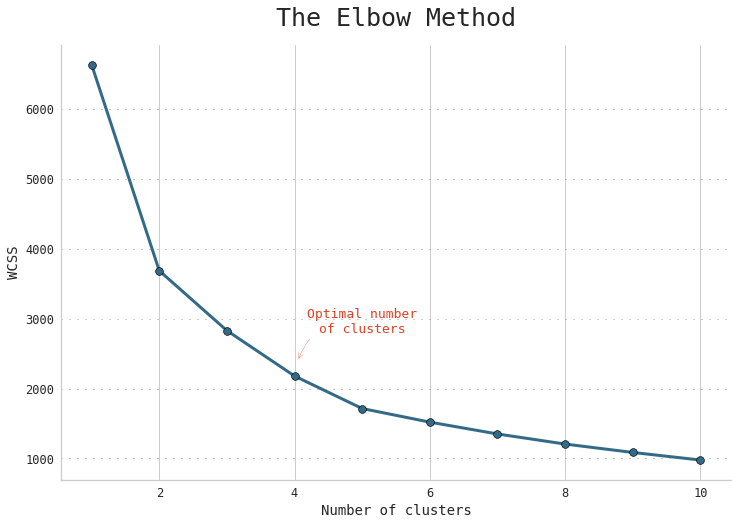

In [29]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, random_state = 228)
    km.fit(data_clustring)
    wcss.append(km.inertia_)
    
plt.figure(figsize = (12, 8))
plt.title('The Elbow Method', size = 25, y = 1.03, fontname = 'monospace')
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 0.8, zorder = 0,  dashes = (1,7))
a = sns.lineplot(x = range(1, 11), y = wcss, color = '#336b87', linewidth = 3)
sns.scatterplot(x = range(1, 11), y = wcss, color = '#336b87', s = 60, edgecolor = 'black', zorder = 5)
plt.ylabel('WCSS', size = 14, fontname = 'monospace')
plt.xlabel('Number of clusters', size = 14, fontname = 'monospace')
plt.xticks(size = 12, fontname = 'monospace')
plt.yticks(size = 12, fontname = 'monospace')

for j in ['right', 'top']:
    a.spines[j].set_visible(False)
a.spines['bottom'].set_linewidth(1.3)
a.spines['left'].set_linewidth(1.3)

plt.annotate('''Optimal number
of clusters''', xy = (4.05, 2400), xytext = (5, 2800),
             arrowprops = dict(facecolor = 'steelblue', arrowstyle = "->", connectionstyle = "arc3,rad = 0.4",color = '#dd4124'), 
             fontsize = 13, fontfamily = 'monospace', ha = 'center', color = '#dd4124')

plt.show()

In [30]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components = 4, covariance_type = 'spherical', max_iter = 3000, random_state = 228).fit(data_clustring)
labels = gmm.predict(data_clustring)

data['Cluster'] = labels
data_re_clust = {
    0: 'Ordinary client',
    1: 'Elite client',
    2: 'Good client',
    3: 'Potential good client'
}
data['Cluster'] = data['Cluster'].map(data_re_clust)

In [31]:
import plotly.express as px
fig = px.pie(data['Cluster'].value_counts().reset_index(), values = 'Cluster', names = 'index', width = 700, height = 700)
fig.update_traces(textposition = 'inside', 
                  textinfo = 'percent + label', 
                  hole = 0.8, 
                  marker = dict(colors = ['#dd4124','#009473', '#336b87', '#b4b4b4'], line = dict(color = 'white', width = 2)),
                  hovertemplate = 'Clients: %{value}')

fig.update_layout(annotations = [dict(text = 'Number of clients <br>by cluster', 
                                      x = 0.5, y = 0.5, font_size = 28, showarrow = False, 
                                      font_family = 'monospace',
                                      font_color = 'black')],
                  showlegend = False)
                  
fig.show()

LATIHAN 10

In [32]:
import plotly.graph_objs as go
plot = go.Figure()

colors = ['#b4b4b4', '#dd4124', '#009473', '#336b87']
names = ['Ordinary client', 'Elite client', 'Good client', 'Potential good client']

for i in range(4):
    cl = names[i]
    plot.add_trace(go.Scatter3d(x = data.query("Cluster == @cl")['NumAllPurchases'],
                                y = data.query("Cluster == @cl")['AverageCheck'],
                                z = data.query("Cluster == @cl")['Days_is_client'],
                                mode = 'markers',
                                name = names[i],
                                marker = dict(
                                    size = 2,
                                    color = colors[i],  
                                    opacity = 0.6)))

plot.update_traces(hovertemplate = 'Purchases: %{x} <br>Average Check: %{y} <br>Days is client: %{z}')

plot.update_layout(width = 800, height = 800, autosize = True, showlegend = False,
                   scene = dict(xaxis = dict(title = 'Count of purchases', titlefont_color = 'black'),
                                yaxis = dict(title = 'Average check', titlefont_color = 'black'),
                                zaxis = dict(title = 'Days is client', titlefont_color = 'black')),
                   font = dict(family = "monospace", color  = 'black', size = 12),
                   title_text = 'Customers clusters', title_x = 0.5)

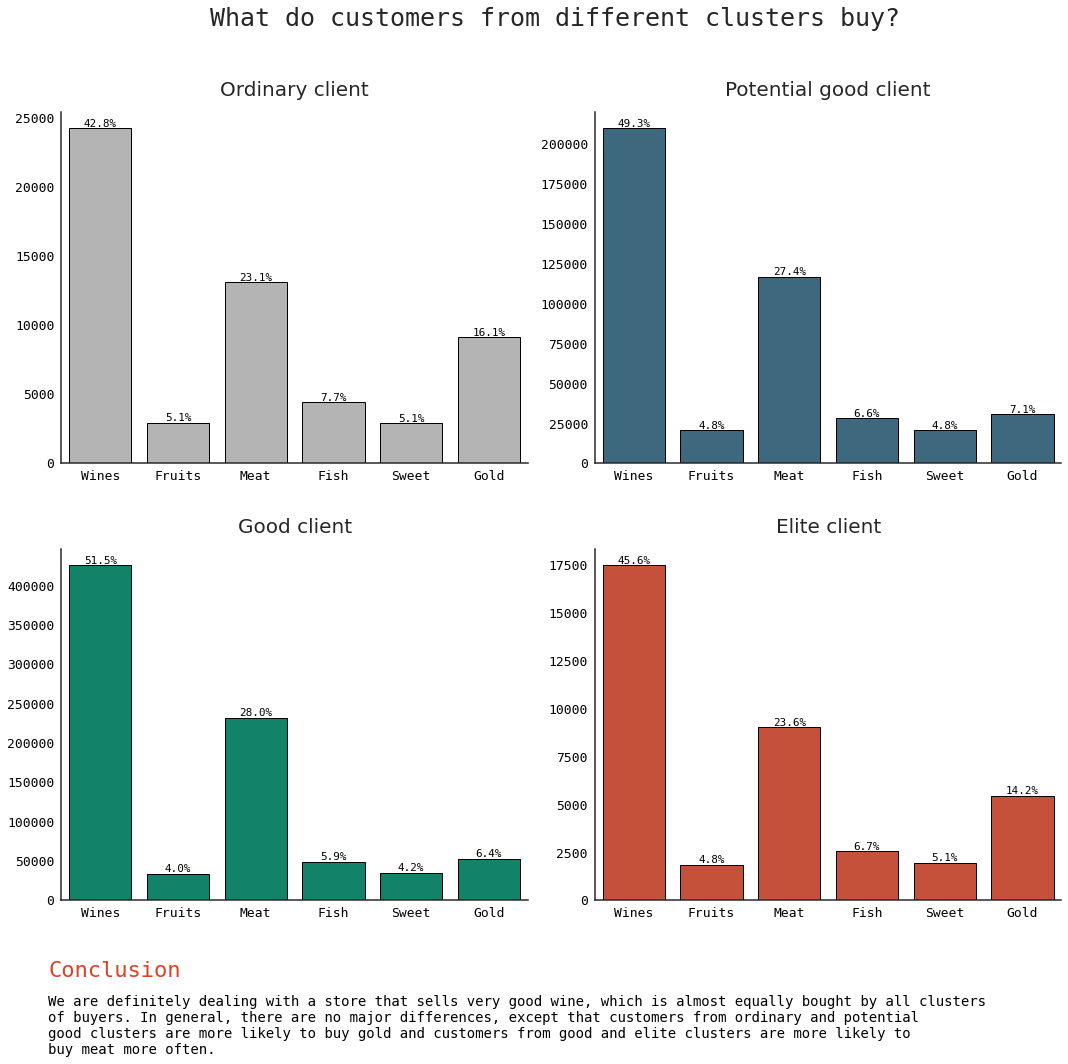

In [39]:
fig = plt.figure(figsize = (15, 12))
k = 1

for i in cl:
    ass = data.groupby(['Cluster']).agg({'Wines': 'sum', 'Fruits': 'sum', 'Meat': 'sum', 'Fish': 'sum', 'Sweet': 'sum', 'Gold': 'sum'}).transpose().reset_index().rename(columns = {'index': 'Category'})[['Category', i]]
    plt.subplot(2, 2, k)
    plt.title(i, size = 20, x = 0.5, y = 1.03)
    a = sns.barplot(data = ass, x = 'Category', y = i, color = colors[i],
                   linestyle = "-", linewidth = 1,
                   edgecolor = "black")
    plt.xticks(fontname = 'monospace', size = 13, color = 'black')
    plt.yticks(fontname = 'monospace', size = 13, color = 'black')
    plt.xlabel('')
    plt.ylabel('')
    for p in a.patches:
        height = p.get_height()
        a.annotate(f'{round((height / sum(ass[i])) * 100, 1)}%', (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   size = 11,
                   xytext = (0, 5), 
                   textcoords = 'offset points',
                   fontname = 'monospace', color = 'black')
        
    for j in ['right', 'top']:
        a.spines[j].set_visible(False)
    for j in ['bottom', 'left']:
        a.spines[j].set_linewidth(1.5)
    k += 1
    
plt.figtext(0.05, -0.05, 'Conclusion', fontname = 'monospace', size = 22, color = '#dd4124')
plt.figtext(0.05, -0.14, '''We are definitely dealing with a store that sells very good wine, which is almost equally bought by all clusters
of buyers. In general, there are no major differences, except that customers from ordinary and potential
good clusters are more likely to buy gold and customers from good and elite clusters are more likely to
buy meat more often.''', fontname = 'monospace', size = 14, color = 'black')
    
plt.figtext(0.2, 1.05, 'What do customers from different clusters buy?', fontname = 'monospace', size = 25)
fig.tight_layout(h_pad = 3)    
plt.show()

In [ ]:
fig = plt.figure(figsize = (15, 10))
plt.title('Participation of customer clusters in marketing campaigns', size = 25, x = 0.5, y = 1.1)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 0.8, zorder = 0,  dashes = (1,7))
a = sns.barplot(x = 'Cmp', y = 'value', hue = 'Cluster',
            data = data.groupby(['Cluster']).agg({'AcceptedCmp1': 'sum','AcceptedCmp2': 'sum', 
                               'AcceptedCmp3': 'sum','AcceptedCmp4': 'sum', 
                               'AcceptedCmp5': 'sum', 'Response': 'sum'}).stack().reset_index().rename(columns = {'level_1':'Cmp', 0: 'value'}),
            dodge = False, palette = ['#dd4124', '#009473', '#b4b4b4', '#336b87'])
plt.xticks(fontname = 'monospace', size = 16, color = 'black')
plt.yticks(fontname = 'monospace', size = 16, color = 'black')
plt.xlabel('')
plt.ylabel('')
for j in ['right', 'top']:
    a.spines[j].set_visible(False)
for j in ['bottom', 'left']:
    a.spines[j].set_linewidth(1.5)
    
plt.figtext(0.12, 0.01, 'Conclusion', fontname = 'monospace', size = 22, color = '#dd4124')
plt.figtext(0.12, -0.14, '''The best marketing campaigns were the first, fifth and last. The worst results were in the second
campaign. The cluster of elite clients shows the greatest activity. This is a rather strange
trend, because clients with low income are more likely to participate in promotions. Ordinary
customers were not generally interested in any campaign. I dare to assume that we have
information about a fairly good store for wealthy people. In the future, based on these
results, company can plan campaigns more correctly.''', fontname = 'monospace', size = 14, color = 'black')

plt.show()

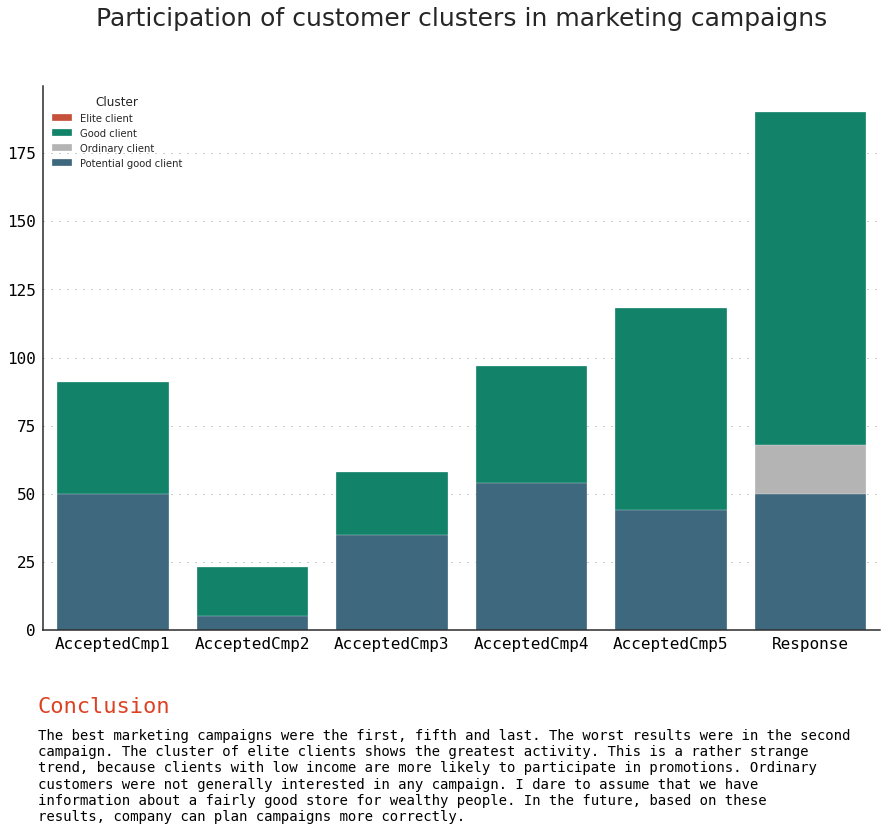

In [40]:
fig = plt.figure(figsize = (15, 10))
plt.title('Participation of customer clusters in marketing campaigns', size = 25, x = 0.5, y = 1.1)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 0.8, zorder = 0,  dashes = (1,7))
a = sns.barplot(x = 'Cmp', y = 'value', hue = 'Cluster',
            data = data.groupby(['Cluster']).agg({'AcceptedCmp1': 'sum','AcceptedCmp2': 'sum', 
                               'AcceptedCmp3': 'sum','AcceptedCmp4': 'sum', 
                               'AcceptedCmp5': 'sum', 'Response': 'sum'}).stack().reset_index().rename(columns = {'level_1':'Cmp', 0: 'value'}),
            dodge = False, palette = ['#dd4124', '#009473', '#b4b4b4', '#336b87'])
plt.xticks(fontname = 'monospace', size = 16, color = 'black')
plt.yticks(fontname = 'monospace', size = 16, color = 'black')
plt.xlabel('')
plt.ylabel('')
for j in ['right', 'top']:
    a.spines[j].set_visible(False)
for j in ['bottom', 'left']:
    a.spines[j].set_linewidth(1.5)
    
plt.figtext(0.12, 0.01, 'Conclusion', fontname = 'monospace', size = 22, color = '#dd4124')
plt.figtext(0.12, -0.14, '''The best marketing campaigns were the first, fifth and last. The worst results were in the second
campaign. The cluster of elite clients shows the greatest activity. This is a rather strange
trend, because clients with low income are more likely to participate in promotions. Ordinary
customers were not generally interested in any campaign. I dare to assume that we have
information about a fairly good store for wealthy people. In the future, based on these
results, company can plan campaigns more correctly.''', fontname = 'monospace', size = 14, color = 'black')

plt.show()

Sekarang kita memiliki beberapa fitur baru, mari kita lihat statistik data.

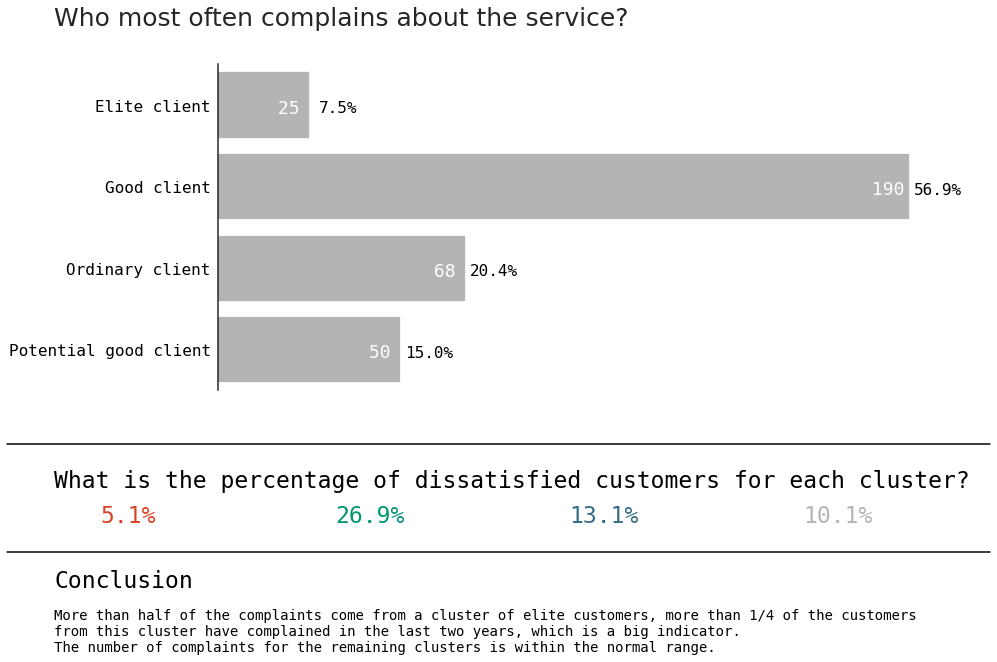

In [41]:
fig = plt.figure(figsize = (13, 6))
plt.title('Who most often complains about the service?', size = 25, x = 0.17, y = 1.1)
a = sns.barplot(data = data.groupby(['Cluster']).agg({'Response': 'sum'}).reset_index(), 
                x = 'Response', y = 'Cluster')
plt.xticks([])
plt.yticks(fontname = 'monospace', size = 16, color = 'black')
plt.xlabel('')
plt.ylabel('')

for p in a.patches:
    width = p.get_width()
    plt.text(width - 7, p.get_y() + 0.55*p.get_height(), f'{width: .0f}',
             ha = 'center', va = 'center', fontname = 'monospace', fontsize = 18, color = 'white')
    plt.text(8 + width, p.get_y() + 0.55*p.get_height(), f'{round((width / 334) * 100, 1)}%',
             ha = 'center', va = 'center', fontname = 'monospace', fontsize = 16, color = 'black')
    if p.get_width() == 189:
        p.set_color('#dd4124')
    elif p.get_width() == 54:
        p.set_color('#009473')
    elif p.get_width() == 66:
        p.set_color('#336b87')
    else:
        p.set_color('#b4b4b4')
for j in ['right', 'top', 'bottom']:
    a.spines[j].set_visible(False)
a.spines['left'].set_linewidth(1.5)

l1 = lines.Line2D([-0.1, 0.95], [0, 0], transform = fig.transFigure, figure = fig, color = 'black', linestyle = '-',linewidth = 1.5)
fig.lines.extend([l1])

plt.figtext(-0.05, -0.1, 'What is the percentage of dissatisfied customers for each cluster?', fontname = 'monospace', size = 23, color = 'black')

x = 0
cl = 0
colors = ['#dd4124', '#009473', '#336b87', '#b4b4b4']
for i in round(data.groupby(['Cluster']).agg({'Response': 'mean'}).reset_index()['Response'] * 100, 1):
    plt.figtext(x, -0.18, f'{i}%', fontname = 'monospace', size = 23, color = colors[cl])
    x += 0.25
    cl += 1

l2 = lines.Line2D([-0.1, 0.95], [-0.25, -0.25], transform = fig.transFigure, figure = fig, color = 'black', linestyle = '-',linewidth = 1.5)
fig.lines.extend([l2])

plt.figtext(-0.05, -0.33, 'Conclusion', fontname = 'monospace', size = 23, color = 'black')
plt.figtext(-0.05, -0.48, '''More than half of the complaints come from a cluster of elite customers, more than 1/4 of the customers
from this cluster have complained in the last two years, which is a big indicator.
The number of complaints for the remaining clusters is within the normal range.''', fontname = 'monospace', size = 14, color = 'black')

plt.show()

In [42]:
df.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent,Days_is_client,NumAllPurchases,AverageCheck,ShareDealsPurchases,TotalAcceptedCmp,ActiveDays
0,Graduation,Single,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,971,65,1617,Single,0,58,Single,972,22,73.5,13.6,1,914
1,Graduation,Single,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,125,57,27,Single,2,40,Single,126,4,6.8,50.0,0,88
2,Graduation,Together,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,472,74,776,Together,0,26,Together,473,20,38.8,5.0,0,447
3,Graduation,Together,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,65,46,53,Together,1,27,Together,66,6,8.8,33.3,0,40
4,PhD,Married,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,321,47,422,Married,1,95,Married,322,14,30.1,35.7,0,228


**Hal-hal yang perlu diperhatikan:**

Informasi berikut dapat disimpulkan tentang pelanggan di cluster yang berbeda.

<img src="https://github.com/KarnikaKapoor/Files/blob/main/Colorful%20Handwritten%20About%20Me%20Blank%20Education%20Presentation%20(3).png?raw=true">
  

<a id="9"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">CONCLUSION</p>

Dalam kasus ini, kita melakukan unsupervised clustering.
Kita memang menggunakan pengurangan dimensi/dimensionality reduction diikuti oleh agglomerative clustering.
Kita datang dengan 4 cluster dan selanjutnya menggunakannya dalam membuat profil pelanggan dalam cluster sesuai dengan struktur keluarga dan pendapatan/pengeluaran mereka(income/spending).

Ini dapat digunakan dalam merencanakan strategi pemasaran yang lebih baik!


**<span style="color:#682F2F;"> Terimakasih Semoga dapat menambah akan pemahaman kalian!</span>**

<a id="10"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">END</p>